In [1]:
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = read_csv('C:/Users/ASUS/Belajar/Untitled Folder/confirmed_acc.csv').iloc[39:]
df = df.reset_index()

# manual update apabila update data utama terlambat
last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')
data = [
        ['4/1/2020', 1677],
        ['4/2/2020', 1790],
        ['4/3/2020', 1986],
        ['4/4/2020', 2092],
        ['4/5/2020', 2273],
        ['4/6/2020', 2491],
        ['4/7/2020', 2738],
        ['4/8/2020', 2956],
        ['4/9/2020', 3293],
        ['4/10/2020', 3512],
        ['4/11/2020', 3842],
        ['4/12/2020', 4241],
        ['4/13/2020', 4557]
        
        ]

for k,v in data:
    if datetime.strptime(k, "%m/%d/%Y") > last_date:
        df = df.append({'date' : k, 'cases' : v} ,ignore_index=True)

# update last_date
last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')

In [3]:
df['index'] = df.index
df.columns = ['indeks', 'tanggal', 'kasus']
df

,indeks,tanggal,kasus
0,0,3/1/2020,0
1,1,3/2/2020,2
2,2,3/3/2020,2
3,3,3/4/2020,2
4,4,3/5/2020,2
5,5,3/6/2020,4
6,6,3/7/2020,4
7,7,3/8/2020,6
8,8,3/9/2020,19
9,9,3/10/2020,27


In [4]:
degree = 3

x = df['indeks'].values.reshape(df['indeks'].size,1)
y = df['kasus'].values.reshape(df['kasus'].size,1)
polynomial_features= PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

In [5]:
def forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return '{:d}'.format(int(round(model_pred[0][0])))

start_date = to_datetime(df['tanggal'].iloc[0], format='%m/%d/%Y')
last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')

def display_forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    end_date = start_date + timedelta(days=n_days_after)
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return end_date.strftime("%d %B %Y"), '{:d}'.format(int(round(model_pred[0][0])))

def days_passed_timedelta():
    # mengembalikan hasil objek timedelta
    # berapa hari telah lewat sejak tanggal awal (start_date)
    last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')
    return last_date.date() - start_date.date() 

def date_days_after(n_days_after):
    tanggal = start_date + timedelta(days=n_days_after)
    return tanggal.date().strftime("%d %B %Y")

def display_tabel_prediksi(days_after):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_prediksi = PrettyTable(['ke-', 'tanggal','prediksi'])
    for x in range(days_passed+1,days_after+1):
        tabel_prediksi.add_row([x, date_days_after(x), forecast_days_after(x)])
    print(tabel_prediksi)
    
def display_equation(degree):
    for coef in model.coef_:
        pass
    if degree == 2:
        y = md("Persamaan Regresi Polinomial:  \n$y = (%a) \cdot x^{2} + (%a) \cdot x + (%a) $"%(coef[2], coef[1], model.intercept_[0]))
    elif degree == 3:
        y = md("Persamaan Regresi Polinomial:  \n$y = (%a) \cdot x^{3} + (%a) \cdot x^{2} + (%a) \cdot x + (%a) $"%(coef[3], coef[2], coef[1], model.intercept_[0]))
    else:
        y= 'please construct from parameters'
    return y

def display_widget_forecast_days_after():
    print('data terakhir adalah data hari ke-' + str(days_passed_timedelta().days) + \
          ', untuk mendapatkan prediksi ke depan geser slider ke kanan (gunakan tombol panah kanan -> pada keyboard):')
    @interact(x=(days_passed_timedelta().days+1, 365,1))
    def h(x=days_passed_timedelta().days+1):
        tabel_prediksi = PrettyTable(['hari ke-x', 'tanggal','prediksi akumulasi'])
        tabel_prediksi.add_row([x, date_days_after(x), forecast_days_after(x)])
        print(tabel_prediksi)

In [6]:
# tabel parameter
tabel_parameter = PrettyTable(['parameter', 'nilai'])
tabel_parameter.add_row(['polynomial\ndegree', degree])
tabel_parameter.add_row(['RMSE','{:.10}'.format(rmse)])
tabel_parameter.add_row(['R^2', '{:.10}'.format(r2)])

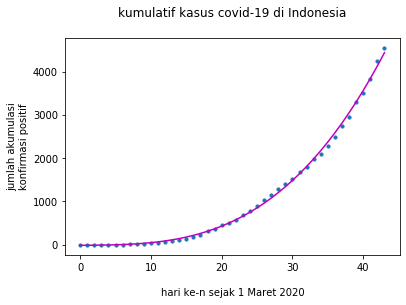

+------------+--------------+
| parameter  |    nilai     |
+------------+--------------+
| polynomial |      3       |
|   degree   |              |
|    RMSE    | 50.02114224  |
|    R^2     | 0.9985243015 |
+------------+--------------+


Persamaan Regresi Polinomial:  
$y = (0.05839459585255841) \cdot x^{3} + (-0.14099347285613198) \cdot x^{2} + (1.6995856020291302) \cdot x + (-13.228436072104614) $

In [7]:
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.title('kumulatif kasus covid-19 di Indonesia\n')
plt.xlabel('\nhari ke-n sejak 1 Maret 2020')
plt.ylabel('jumlah akumulasi\nkonfirmasi positif')

plt.plot(x, y_poly_pred, color='m')
plt.show()
print(tabel_parameter)
display_equation(degree)

In [8]:
# widget appear in editor but not displayed when published;
# download notebook to display widget;
# display_widget_forecast_days_after()

display_forecast_days_after(100)

('09 June 2020', '57141')

##### tabel prediksi hingaa hari ke 100
display_tabel_prediksi(100)

In [9]:
# tabel prediksi hingaa hari ke 100
display_tabel_prediksi(100)

+-----+---------------+----------+
| ke- |    tanggal    | prediksi |
+-----+---------------+----------+
|  44 | 14 April 2020 |   4763   |
|  45 | 15 April 2020 |   5099   |
|  46 | 16 April 2020 |   5451   |
|  47 | 17 April 2020 |   5818   |
|  48 | 18 April 2020 |   6201   |
|  49 | 19 April 2020 |   6602   |
|  50 | 20 April 2020 |   7019   |
|  51 | 21 April 2020 |   7453   |
|  52 | 22 April 2020 |   7905   |
|  53 | 23 April 2020 |   8374   |
|  54 | 24 April 2020 |   8862   |
|  55 | 25 April 2020 |   9369   |
|  56 | 26 April 2020 |   9895   |
|  57 | 27 April 2020 |  10440   |
|  58 | 28 April 2020 |  11005   |
|  59 | 29 April 2020 |  11589   |
|  60 | 30 April 2020 |  12194   |
|  61 |  01 May 2020  |  12820   |
|  62 |  02 May 2020  |  13467   |
|  63 |  03 May 2020  |  14136   |
|  64 |  04 May 2020  |  14826   |
|  65 |  05 May 2020  |  15538   |
|  66 |  06 May 2020  |  16273   |
|  67 |  07 May 2020  |  17031   |
|  68 |  08 May 2020  |  17812   |
|  69 |  09 May 2020